# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0,'..')

In [3]:
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName

from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.model_creator import Optimizer

from src.base.experiment.dataset.benchmark_dataset import BenchmarkDataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection

from src.exp_runner import ExperimentRunner

from src.m_utils.mtl_approach import MTLApproach

from src.base.experiment.tasks.task import ICAO_REQ
from src.base.experiment.tasks.task import MNIST_TASK
from src.base.experiment.tasks.task import FASHION_MNIST_TASK
from src.base.experiment.tasks.task import CIFAR_10_TASK
from src.base.experiment.tasks.task import CELEB_A_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [4]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16_mtl_3_approach',
        'description': 'Training MTL network for CIFAR-10 tasks with Handcrafted 3 network architecture',
        'tags': ['mtl', 'handcrafted_3', 'handcrafted_3_exp', 'cifar_10', 'benchmark', '10 epochs'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': MTLApproach.HAND_3,
        'benchmarking': {
            'use_benchmark_data': True,
            'benchmark_dataset': BenchmarkDataset.CIFAR_10,
            'tasks': list(CIFAR_10_TASK)
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': False,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': False,
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': False,
        'exec_nas': False,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 10,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 120314
Process ID: 128362
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training MTL network for CIFAR-10 tasks with '
                               'Handcrafted 3 network architecture',
                'name': 'train_vg16_mtl_3_approach',
                'src_files': ['../src/**/*.py'],
                'tags': ['mtl',
                         'handcrafted_3',
                         'handcrafted_3_exp',
                         'cifar10',
                         'benchmark',
                         '1 epochs']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'name': 'vgg16', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fc5a63c6820>}>,
                      'batch_size': 32,
                      'dropout': 0.3,
                      'early_sto

# Load Data

In [5]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (40000, 12)
ValidationData.shape: (10000, 12)
TestData.shape: (10000, 12)
Data loaded


# Sampling Training Data

In [6]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [7]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [8]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 40000 validated image filenames.
Found 10000 validated image filenames.
Found 10000 validated image filenames.
TOTAL: 60000

Logging class indices
 .. MTL model not logging class indices!

Using benchmarking dataset. Not logging class labels!


# Setup Experiment

In [9]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [10]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Using benchmark data. Not doing summary_labels_dist()


# Create Model

In [11]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

In [12]:
%%capture
runner.visualize_model(outfile_path=f"figs/handcrafted_mtl_model_3.png")

In [13]:
%%capture
runner.model_summary()

# Training Model

In [14]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 17,018,644
  .. Trainable params: 2,303,956
  .. Non-trainable params: 14,714,688
1250/1250 [==============================] - 341s 254ms/step - loss: 0.2810 - airplane_loss: 0.2624 - automobile_loss: 0.2744 - bird_loss: 0.2912 - cat_loss: 0.2988 - deer_loss: 0.2902 - dog_loss: 0.2973 - frog_loss: 0.2707 - horse_loss: 0.2944 - ship_loss: 0.2544 - truck_loss: 0.2759 - airplane_accuracy: 0.9038 - automobile_accuracy: 0.9062 - bird_accuracy: 0.8994 - cat_accuracy: 0.8995 - deer_accuracy: 0.8996 - dog_accuracy: 0.8999 - frog_accuracy: 0.9036 - horse_accuracy: 0.9024 - ship_accuracy: 0.9036 - truck_accuracy: 0.9039 - val_loss: 0.2319 - val_airplane_loss: 0.2025 - val_automobile_loss: 0.1973 - val_bird_loss: 0.2620 - val_cat_loss: 0.2763 - val_deer_loss: 0.2486 - val_dog_loss: 0.2444 - val_frog_loss: 0.2247 - val_horse_loss: 0.2296 - val_ship_loss: 0.2005 - val_tru

# Plots

-------------------- draw training history -------------------


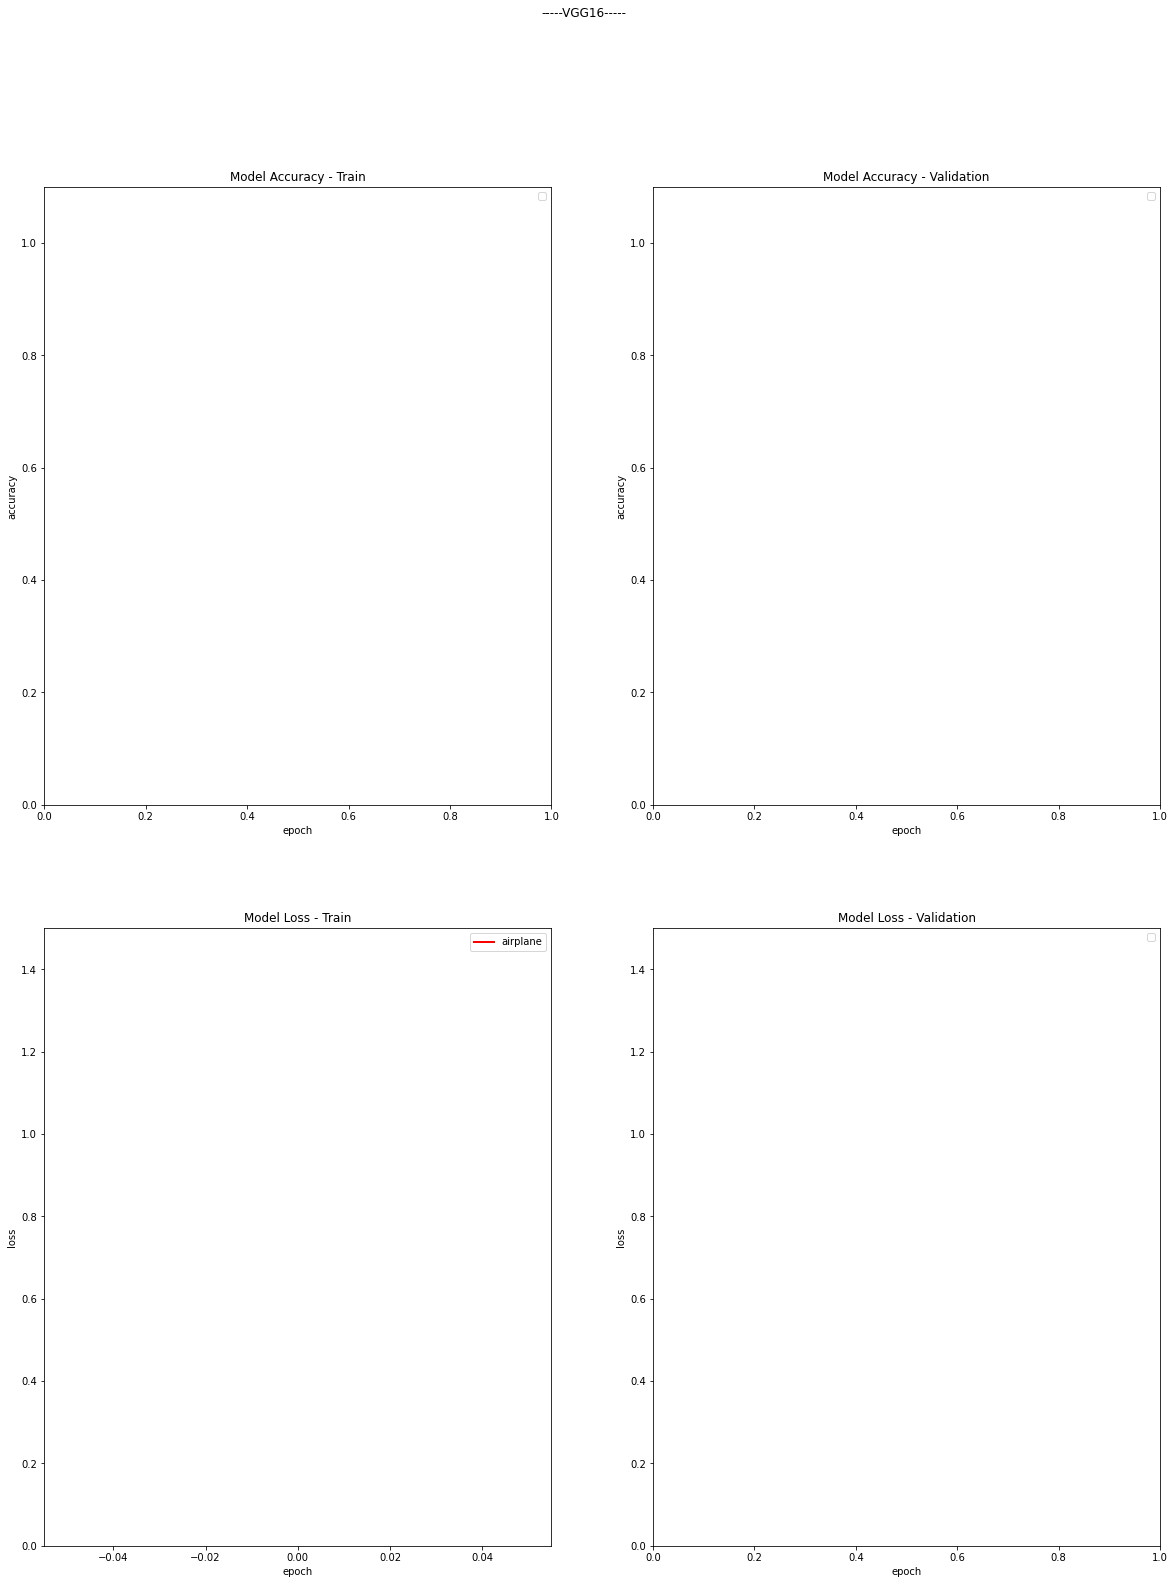

In [16]:
runner.draw_training_history()

# Load Best Model

In [17]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [18]:
runner.save_model()

-------------------- save model -------------------
Not saving model!


# Test Trained Model

## Validation Split

In [19]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
313/313 [==============================] - 22s 70ms/step
Prediction finished!
  Task  0: airplane        | EER_mean: 0.18640 | EER_interp: 0.18620 | ACC: 0.81360
  Task  1: automobile      | EER_mean: 0.16430 | EER_interp: 0.16420 | ACC: 0.83570
  Task  2: bird            | EER_mean: 0.27260 | EER_interp: 0.27260 | ACC: 0.72740
  Task  3: cat             | EER_mean: 0.28280 | EER_interp: 0.28310 | ACC: 0.71710
  Task  4: deer            | EER_mean: 0.24410 | EER_interp: 0.24410 | ACC: 0.75590
  Task  5: dog             | EER_mean: 0.23280 | EER_interp: 0.23270 | ACC: 0.76720
  Task  6: frog            | EER_mean: 0.18940 | EER_interp: 0.19000 | ACC: 0.81050
  Task  7: horse           | EER_mean: 0.22970 | EER_interp: 0.22960 | ACC: 0.77040
  Task  8: ship            | EER_mean: 0.14460 | EER_interp: 0.14460 | ACC: 0.85540
  Task  9: truck           | EER_mean: 0.18790 | EER_interp: 0.18790 | ACC: 0.81210
final_EER_mean: 21.35% | final_EER_med

## Test Split

In [20]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
313/313 [==============================] - 20s 64ms/step
Prediction finished!
  Task  0: airplane        | EER_mean: 0.17160 | EER_interp: 0.17180 | ACC: 0.82840
  Task  1: automobile      | EER_mean: 0.16010 | EER_interp: 0.16000 | ACC: 0.83990
  Task  2: bird            | EER_mean: 0.27570 | EER_interp: 0.27590 | ACC: 0.72430
  Task  3: cat             | EER_mean: 0.29400 | EER_interp: 0.29400 | ACC: 0.70600
  Task  4: deer            | EER_mean: 0.23600 | EER_interp: 0.23600 | ACC: 0.76400
  Task  5: dog             | EER_mean: 0.23970 | EER_interp: 0.23980 | ACC: 0.76030
  Task  6: frog            | EER_mean: 0.18500 | EER_interp: 0.18500 | ACC: 0.81500
  Task  7: horse           | EER_mean: 0.22740 | EER_interp: 0.22770 | ACC: 0.77250
  Task  8: ship            | EER_mean: 0.13990 | EER_interp: 0.14000 | ACC: 0.86010
  Task  9: truck           | EER_mean: 0.18630 | EER_interp: 0.18610 | ACC: 0.81370
final_EER_mean: 21.16% | final_EER_med

# Visualize Model Classification

# Finishing Experiment Manager

In [ ]:
runner.finish_experiment()